In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('../books.csv')

In [95]:
display(df.head())

,category,votes,title,description,author_name,author_about,pages,rating,ratings,reviews,publication_info
0,Fiction,94733,The Wedding People,Alternate cover edition of ISBN 9781250899576....,Alison Espach,"Alison Espach grew up in Trumbull, Connecticut...",384,4.11,678267,75724,"July 30, 2024"
1,Fiction,67268,Intermezzo,"An exquisitely moving story about grief, love,...",Sally Rooney,Sally Rooney was born in 1991 and lives in Dub...,454,3.85,263221,45474,"September 24, 2024"
2,Fiction,51958,Welcome to the Hyunam-Dong Bookshop,Yeongju is burned out. With her high-flying ca...,Hwang Bo-Reum,Hwang Bo-reum studied Computer Science and wor...,307,3.92,68741,13013,"January 17, 2022"
3,Fiction,50659,Blue Sisters,Three estranged siblings return to their famil...,Coco Mellors,Coco Mellors is a writer from London. She move...,352,3.94,225619,31039,"May 23, 2024"
4,Fiction,48432,Here One Moment,"\nIf you knew your future, would you try to fi...",Liane Moriarty,Liane Moriarty is the author of the #1 New Yor...,512,4.01,230073,23896,"September 10, 2024"


In [96]:
df.shape

(300, 11)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   category          300 non-null    object 
 1   votes             300 non-null    int64  
 2   title             300 non-null    object 
 3   description       300 non-null    object 
 4   author_name       300 non-null    object 
 5   author_about      251 non-null    object 
 6   pages             300 non-null    object 
 7   rating            300 non-null    float64
 8   ratings           300 non-null    int64  
 9   reviews           300 non-null    int64  
 10  publication_info  300 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 25.9+ KB


In [98]:
df.isna().sum()

category             0
votes                0
title                0
description          0
author_name          0
author_about        49
pages                0
rating               0
ratings              0
reviews              0
publication_info     0
dtype: int64

There are many empty values in 'author_about' column. Hence, we drop this column.

In [99]:
df.drop(columns = ['author_about'], inplace = True)

In [100]:
df.isnull().sum()

category            0
votes               0
title               0
description         0
author_name         0
pages               0
rating              0
ratings             0
reviews             0
publication_info    0
dtype: int64

There are no columns with null values

In [101]:
print(df.duplicated().sum())

0


None of the rows have duplicate values, hence we have nothing to drop

In [102]:
# pages is an object type, but can be converted to numeric type
df['pages'] = pd.to_numeric(df['pages'], errors='coerce')

In [103]:
# publication_info column has date information, and is converted to datetime type
df['publication_info'] = pd.to_datetime(df['publication_info'], errors='coerce')

In [104]:
# list of text columns to normalize
text_cols = ['category', 'title', 'description', 'author_name']

for col in text_cols:
    df[col] = (
        df[col]
        .astype(str)  # all values converted to string
        .str.lower()  # lowercase
        .str.strip()  # remove leading/trailing whitespace
        .str.replace(r'\s+', ' ', regex=True)  # replace multiple spaces with one
    )

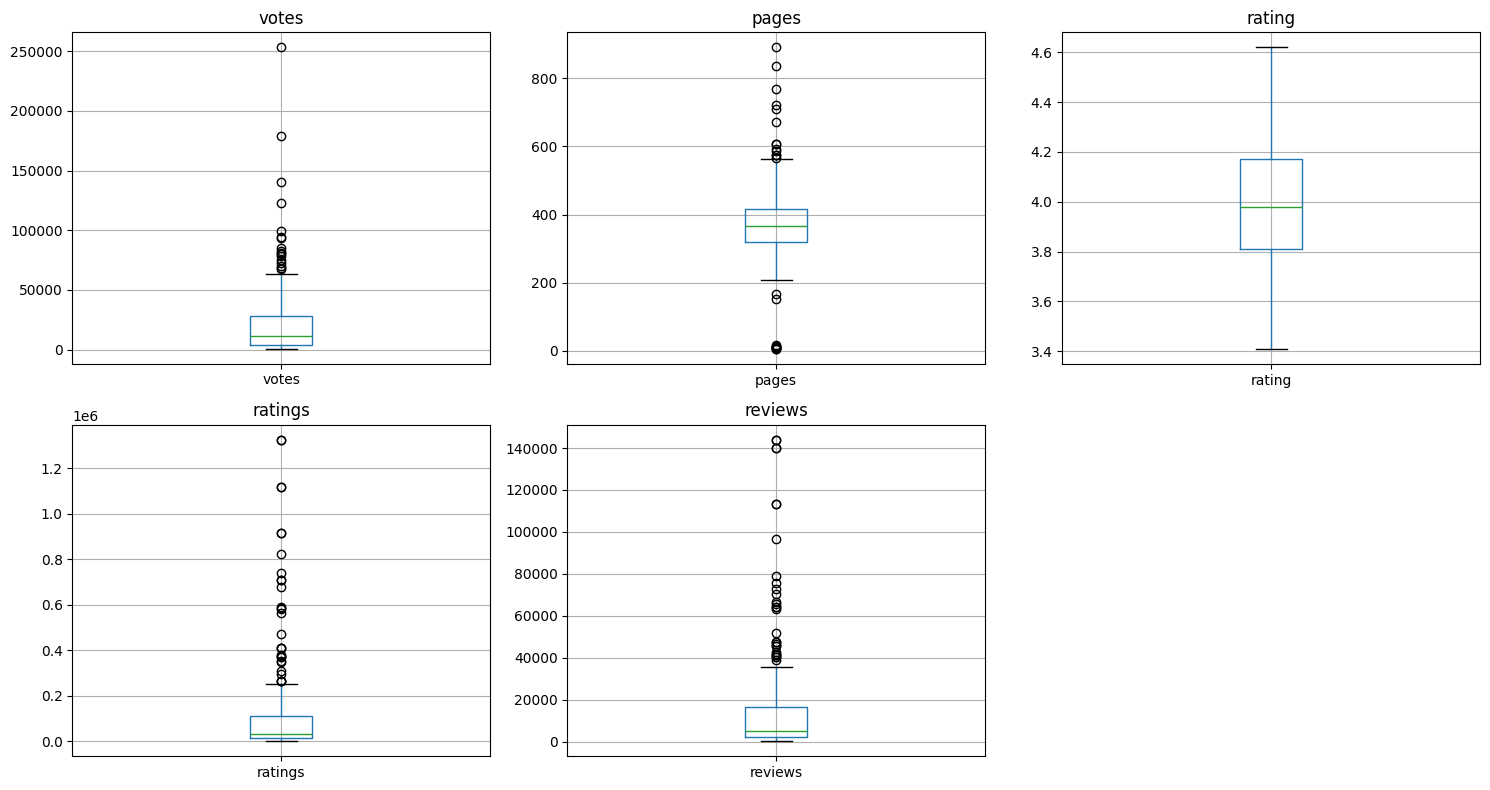

In [105]:
# list of numeric columns to visualize for outliers
numeric_cols = ['votes', 'pages', 'rating', 'ratings', 'reviews']

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    df.boxplot(column=col)
    plt.title(col)
plt.tight_layout()
plt.show()

Outliers are not dropped as high values of ratings, reviews, and votes is not uncommon for popularity metrics. 

There are many books with very low page counts, hence these are investigated to find data inaccuracies

In [106]:
# Show books with 0 or very low page counts (e.g., less than 50)
low_page_books = df[df['pages'] < 50]
print(low_page_books[['category', 'title', 'author_name', 'pages']])

# Show books with exactly 0 pages
zero_page_books = df[df['pages'] == 0]
print(zero_page_books[['category', 'title', 'author_name', 'pages']])

# Show books with missing (NaN) page counts
missing_page_books = df[df['pages'].isna()]
print(missing_page_books[['category', 'title', 'author_name', 'pages']])

      category                           title         author_name  pages
180  audiobook                     funny story         emily henry   11.0
181  audiobook                       the women      kristin hannah   15.0
182  audiobook             just for the summer                  ab   12.0
185  audiobook        somewhere beyond the sea          t.j. klune   16.0
187  audiobook                           james    percival everett    8.0
191  audiobook  from here to the great unknown  lisa marie presley    6.0
192  audiobook          the anxious generation      jonathan haidt   11.0
194  audiobook                 bits and pieces     whoopi goldberg    7.0
198  audiobook                 maybe this time        cara bastone    6.0
199  audiobook    revenge of the tipping point    malcolm gladwell    9.0
Empty DataFrame
Columns: [category, title, author_name, pages]
Index: []
      category                           title       author_name  pages
183  audiobook              listen for th

We find that all books with low or NaN page counts are audiobooks. Since page numbers are not applicable for audiobooks anyway, we set all page values for audiobooks as NaN. During analysis, these rows can be excluded by excluding books with category == 'audiobook'.

In [107]:
df.loc[df['category'] == 'audiobook', 'pages'] = np.nan

In [108]:
df.isna().sum()

category             0
votes                0
title                0
description          0
author_name          0
pages               20
rating               0
ratings              0
reviews              0
publication_info     2
dtype: int64

The 20 books with NaN values are audiobooks as found earlier.

In [109]:
missing_pages = df[df['publication_info'].isna()]
print(missing_pages[['title', 'author_name', 'publication_info']])

                            title    author_name publication_info
178                 shred sisters   betsy lerner              NaT
256  how to tell when we will die  johanna hedva              NaT


In [110]:
df.loc[(df['title'] == 'shred sisters'), 'publication_info'] = pd.to_datetime('2024-10-01')
df.loc[(df['title'] == 'how to tell when we will die'), 'publication_info'] = pd.to_datetime('2024-09-24')

The missing/incorrect publication info was found through online search and corrected.

In [111]:
print(df['category'].unique())
print(df['category'].value_counts())

['fiction' 'historical fiction' 'mystery & thriller' 'romance' 'romantasy'
 'fantasy' 'science fiction' 'horror' 'debut novel' 'audiobook'
 'young adult fantasy' 'young adult fiction' 'nonfiction' 'memoir'
 'history & biography']
category
fiction                20
historical fiction     20
mystery & thriller     20
romance                20
romantasy              20
fantasy                20
science fiction        20
horror                 20
debut novel            20
audiobook              20
young adult fantasy    20
young adult fiction    20
nonfiction             20
memoir                 20
history & biography    20
Name: count, dtype: int64


This shows that there are no inconsistencies in the category names

In [112]:
df.to_csv('../data/cleaned_books.csv')